In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb           # Libraries to visualise the data

In [93]:
df = pd.read_csv('insurance.csv')

In [111]:
df["region"]

0       2
1       1
2       1
3       4
4       4
       ..
1333    4
1334    3
1335    1
1336    2
1337    4
Name: region, Length: 1338, dtype: object

In [94]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [95]:
df.loc[df["sex"] == "female", "sex"] = 1
df.loc[df["sex"] == "male", "sex"] = 0

In [77]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [97]:
df.loc[df["region"] == "southeast", "region"] = 1
df.loc[df["region"] == "southwest", "region"] = 2
df.loc[df["region"] == "northeast", "region"] = 3
df.loc[df["region"] == "northwest", "region"] = 4

In [98]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,2,16884.92400
1,18,0,33.770,1,no,1,1725.55230
2,28,0,33.000,3,no,1,4449.46200
3,33,0,22.705,0,no,4,21984.47061
4,32,0,28.880,0,no,4,3866.85520


In [112]:
df.loc[df["smoker"] == "yes", "smoker"] = 1
df.loc[df["smoker"] == "no", "smoker"] = 0

In [113]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,4,21984.47061
4,32,0,28.880,0,0,4,3866.85520


Visulalizing data using scatterplot and heatmap

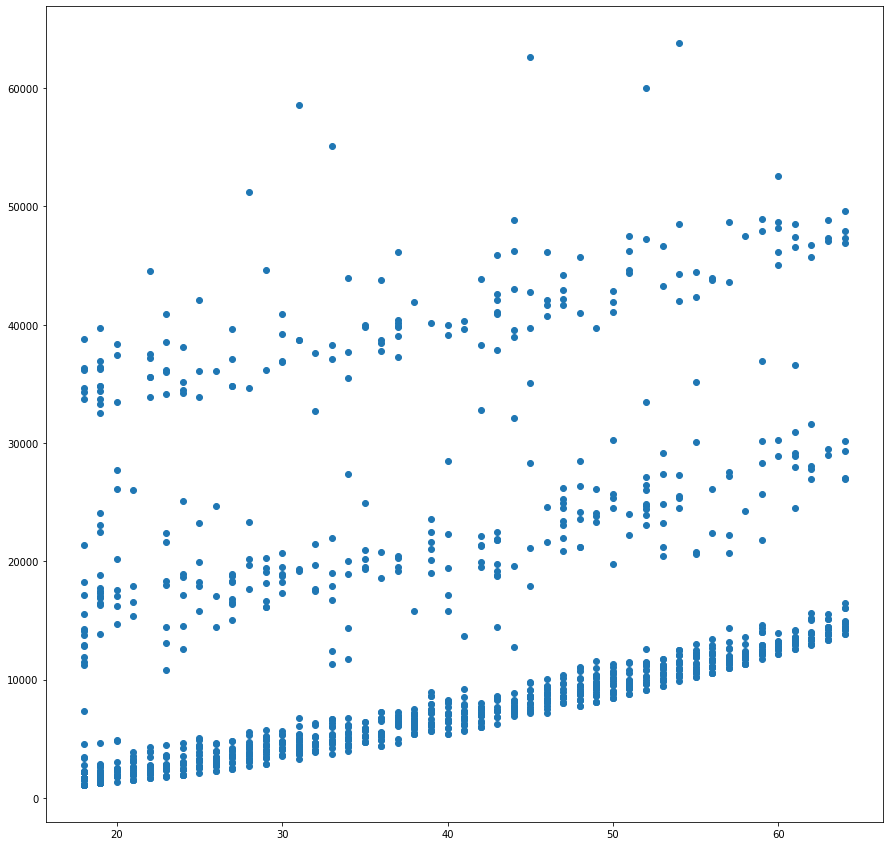

In [114]:
plt.figure(figsize = (15,15))
plt.scatter(df['age'], df['charges'])

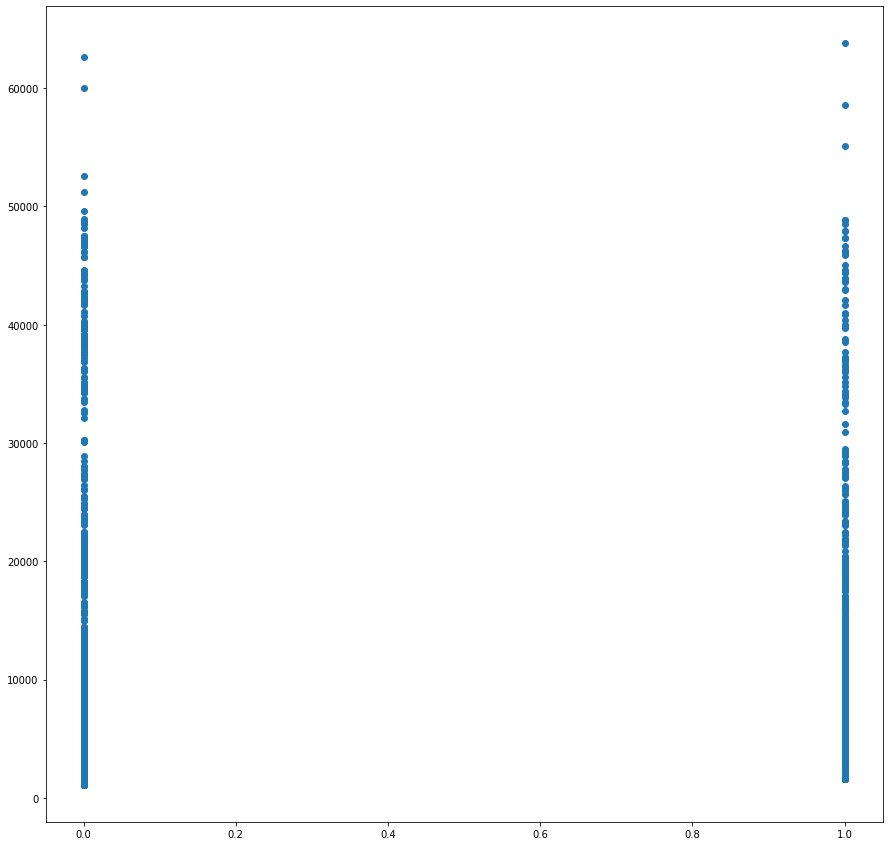

In [115]:
plt.figure(figsize = (15,15))
plt.scatter(df['sex'], df['charges'])

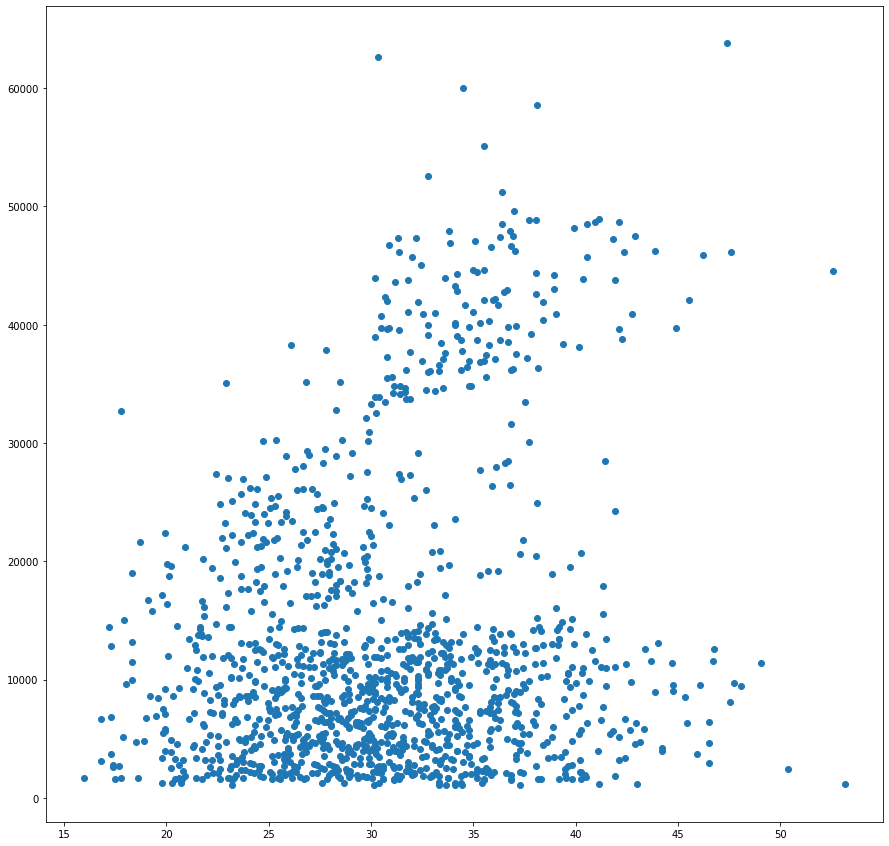

In [116]:
plt.figure(figsize = (15,15))
plt.scatter(df['bmi'], df['charges'])

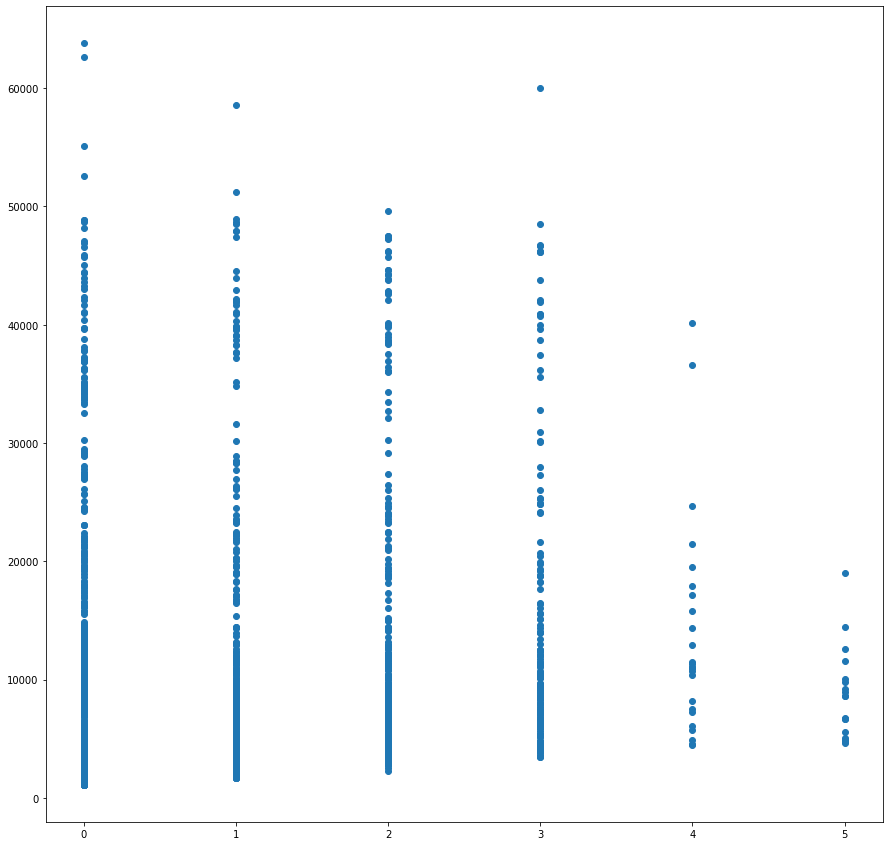

In [117]:
plt.figure(figsize = (15,15))
plt.scatter(df['children'], df['charges'])

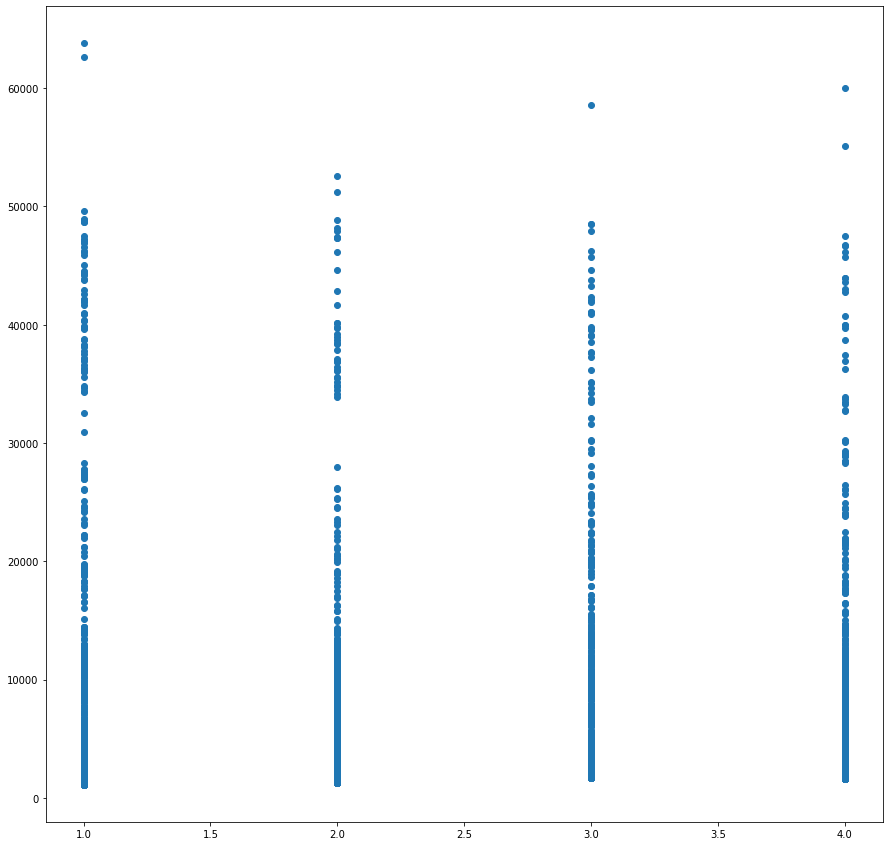

In [118]:
plt.figure(figsize = (15,15))
plt.scatter(df['region'], df['charges'])

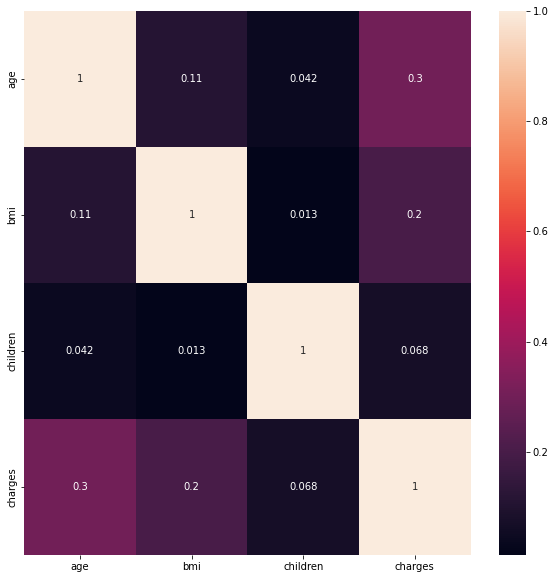

In [119]:
plt.figure(figsize = (10,10))
heatmap = sb.heatmap(df.corr(), annot = True)                         # Correlation between features.

DEFINING THE INPUT AND OUTPUT SET

In [211]:
x = df.drop(['charges'], axis= 1).values
y = df['charges'].values

In [212]:
x

array([[19, 1, 27.9, 0, 1, 2],
       [18, 0, 33.77, 1, 0, 1],
       [28, 0, 33.0, 3, 0, 1],
       ...,
       [18, 1, 36.85, 0, 0, 1],
       [21, 1, 25.8, 0, 0, 2],
       [61, 1, 29.07, 0, 1, 4]], dtype=object)

In [213]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

SPLITTING THE DATASET INTO TRAINING AND TESTING SET

In [235]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(x, y, test_size = 0.1, random_state = 0)

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [238]:
predicted_y = lr.predict(test_x)
print(predicted_y)

[11295.02602759  9499.16398208 38215.0602703  16372.12097258
  7321.21503703  3725.04160037  1297.03394987 14592.39262329
  9297.785253    7749.34011822  4364.05296833 10607.64868059
  8956.39914211  3856.75552755 28082.01124671 10777.76472726
 11584.7132758   5728.95359701  8493.06959168 26704.7703539
 33892.81184929 14582.82767903 11407.57430837 32085.17960738
  4066.26468164  8815.85444163   928.41808101  9797.03610476
  3809.56969673 10670.14583618  9315.95292272 39834.09891886
 15704.56198416 13893.43699359 24489.06968182  4867.26174
 12490.31190371 30730.75526103 33715.60361707  3754.56307371
  3788.44434603  3965.41527942 30154.80330107 39592.3704279
 27623.78775654  5320.85135833 10671.36480321  8106.85743856
  3390.73180026 10302.55939783  5324.38967579  3734.26290537
 33104.91524175 38039.67619909 15884.57024839  6733.56670781
  5614.76863866  9717.31861954  9008.80321704 12037.89104953
  1972.05145712 39101.71454376 14869.78935401 11917.04205871
 13690.06004889 14084.6783334

checking whether the predicted output is same as the known output for the input - (18, 0, 33.77, 1, 0, 1)

In [239]:
print(test_y)

[ 9724.53     8547.6913  45702.02235 12950.0712   9644.2525   4500.33925
  2198.18985 11436.73815  7537.1639   5425.02335  6753.038   10493.9458
  7337.748    4185.0979  18310.742   10702.6424  12523.6048   3490.5491
  6457.8434  33475.81715 23967.38305 12643.3778  23045.56616 23065.4207
  1674.6323   4667.60765  3732.6251   7682.67     3756.6216   8413.46305
  8059.6791  48970.2476  12979.358   20630.28351 14571.8908   4137.5227
  8347.1643  51194.55914 40003.33225  1880.487    5458.04645  2867.1196
 20149.3229  47496.49445 36149.4835  26018.95052 19749.38338  6940.90985
  4718.20355 22192.43711  2899.48935 18838.70366 23568.272   46255.1125
 24227.33724  3268.84665  2322.6218   8827.2099  14478.33015 13112.6048
  1253.936   46718.16325 13919.8229   9630.397   10736.87075  9880.068
 32548.3405  38746.3551   3180.5101   8162.71625 13041.921   11554.2236
 16232.847   13887.9685  13012.20865 13217.0945   7147.105    7731.4271
 20296.86345 47403.88    11658.37915 45863.205    2055.3249   

measuring the accuracy of the model

In [243]:
from sklearn.metrics import r2_score as r2

In [244]:
r2(test_y, predicted_y)   # the best accuracy by adjusting the test set size to 10% 

0.8228828895414438

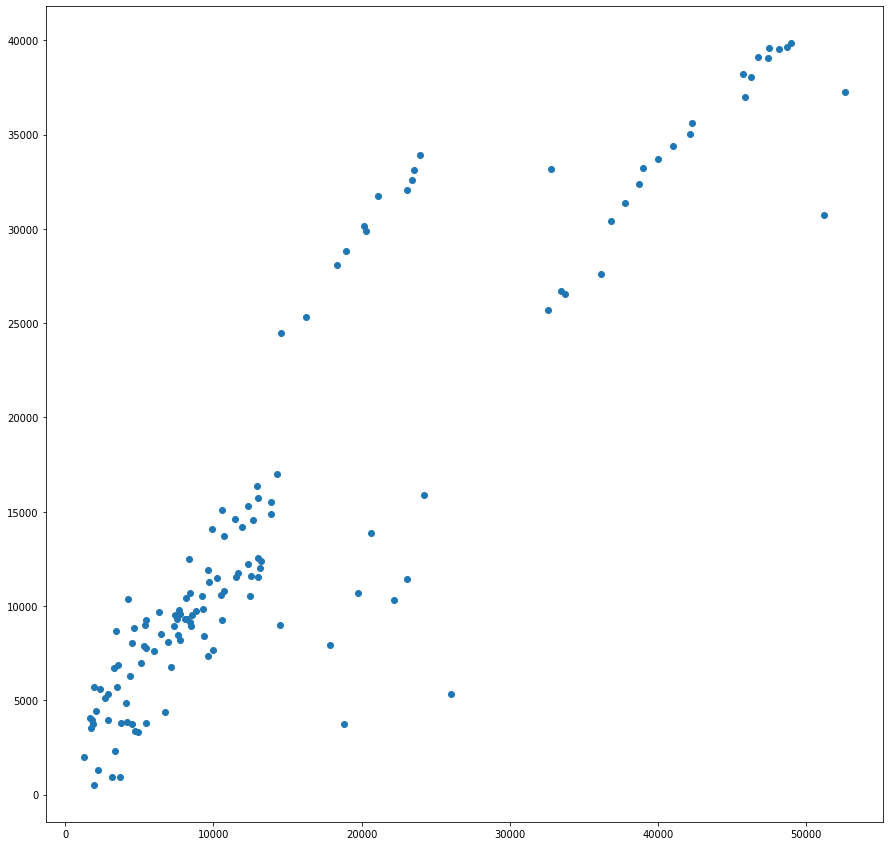

In [245]:
plt.figure(figsize = (15,15))
plt.scatter(test_y, predicted_y)